<a href="https://colab.research.google.com/github/CristianCosci/LAB_MachineLearning_course/blob/main/Keras_MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import numpy as np
from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt

In [91]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

print(type(X_train))
print(X_train.shape)

print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(60000, 28, 28)
<class 'numpy.ndarray'>
(60000,)


In [92]:
print(np.unique(y_train)) # To print classes

[0 1 2 3 4 5 6 7 8 9]


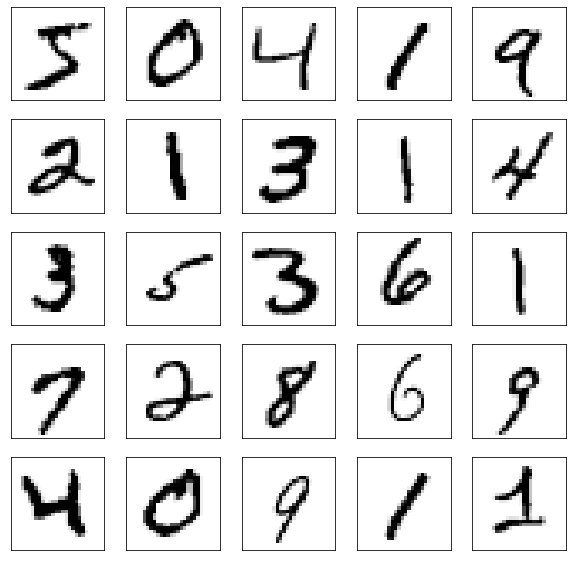

In [93]:
# Plot some images
plt.figure(figsize=(10,10))
for i, image in enumerate(X_train[0:25]):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap='Greys')

plt.show()

In [94]:
# Reshape in a 1d array 
# Convert each image of size 28*28 (2d-vector) into a 1D vector of 1*784
# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
feature_vector_length = 28 * 28 # X_train[0].shape[0] * X_train[0].shape[1]
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

print(X_train.shape)
print(X_test.shape)
print(X_train[0].shape)

(60000, 784)
(10000, 784)
(784,)


In [95]:
print("max pixel values : ",np.max(X_train))
print("min pixel values: ",np.min(X_train))

# Normalization in [0,1]
X_train = X_train.astype("float32")/255 # 255 == np.max(X_train) == np.max(X_test)
X_test = X_test.astype("float32")/255

# Print actual value type 
print("max pixel values : ",np.max(X_train))
print("min pixel values: ",np.min(X_train))

# print new x_train[0]
print("max pixel values : ",np.max(X_train[0]))
print("min pixel values: ",np.min(X_train[0]))
# print(X_train[0])

max pixel values :  255
min pixel values:  0
max pixel values :  1.0
min pixel values:  0.0
max pixel values :  1.0
min pixel values:  0.0


In [96]:
num_classes = 10

In [97]:
# Model with explicit input layer
model_vanilla = keras.Sequential()
model_vanilla.add(layers.InputLayer(input_shape = X_train[0].shape))
model_vanilla.add(layers.Dense(num_classes, activation="softmax"))

# Model with inplicit input layer
model_vanilla2 =  keras.Sequential()
model_vanilla2.add(layers.Dense(num_classes, activation='softmax', input_shape = X_train[0].shape))


**IMPORTANT NOTE**

Multi-layer neural networks with standard activation functions output scores that could assume any real value which may be difficult to work with.

For this reason it is usual to append a softmax function as activation function of the final layer.

Softmax converts the scores to a normalized probability distribution, which is understandable by humans. It can be displayed as final result or used as input to other systems. 

**Softmax**

The softmax function is a function that turns a vector of K real values into a vector of K real values that sum to 1, which can be interpreted as probabilities. If one of the inputs is small or negative, the softmax turns it into a small probability, and if an input is large, then it turns it into a large probability, but it will always remain between 0 and 1. (The high value will have the higher probability than other values.)


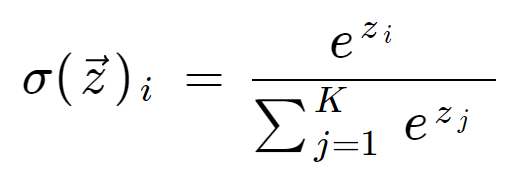

In [98]:
model_vanilla.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [99]:
model_vanilla2.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Example of softmax operation
from scipy.special import softmax
x = [5,6,-3,5,-0.7,4]
print(softmax(x))
print(np.sum(softmax(x)))

[1.96469726e-01 5.34060086e-01 6.59082506e-05 1.96469726e-01
 6.57380917e-04 7.22771730e-02]
0.9999999999999998


In [101]:
# Compile and fit the model
batch_size = 128
epochs = 15

model_vanilla.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
history = model_vanilla.fit(X_train, y_train, batch_size= batch_size, epochs = epochs, validation_split= 0.1) 

Epoch 1/15
422/422 [==============================] - 2s 4ms/step - loss: 0.7218 - accuracy: 0.8174 - val_loss: 0.3548 - val_accuracy: 0.9137
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3806 - accuracy: 0.8985 - val_loss: 0.2900 - val_accuracy: 0.9247
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3330 - accuracy: 0.9081 - val_loss: 0.2633 - val_accuracy: 0.9270
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.3105 - accuracy: 0.9141 - val_loss: 0.2507 - val_accuracy: 0.9318
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2973 - accuracy: 0.9169 - val_loss: 0.2462 - val_accuracy: 0.9332
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2880 - accuracy: 0.9196 - val_loss: 0.2392 - val_accuracy: 0.9348
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.2817 - accuracy: 0.9218 - val_loss: 0.2336 - val_accuracy: 0.9355
Epoch 

**ABUT LOSS FUNCTIONS...**

Cross-Entropy (or log loss) -   It is a measure of the degree of dissimilarities between two probability distribution

In particular Sparse Categorical Cross-entropy loss measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

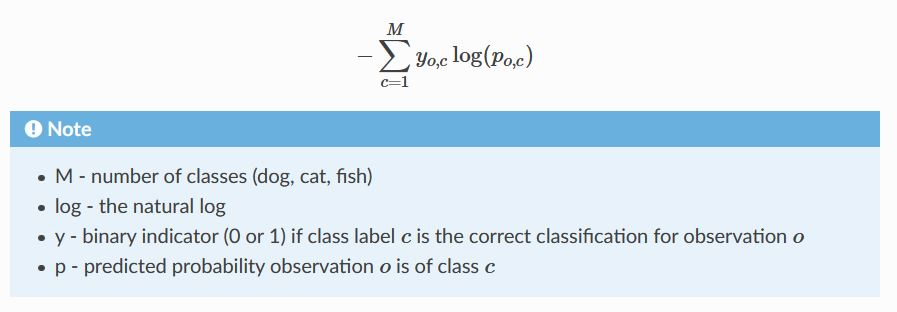

In [102]:
# Evaluate
score = model_vanilla.evaluate(X_test,y_test)
print(model_vanilla.metrics_names)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.2673 - accuracy: 0.9260
['loss', 'accuracy']
Test loss: 0.2673245370388031
Test accuracy: 0.9259999990463257


In [103]:
# Predict class
y_pred = model_vanilla.predict(X_test[:1])
print(y_pred)
y_pred = y_pred.argmax()
print('Predicted class: ', y_pred)

[[6.4082724e-06 3.6573855e-11 1.1310578e-05 5.6388583e-03 5.2998388e-07
  3.0208434e-05 5.1299776e-10 9.9393517e-01 2.0622947e-05 3.5685100e-04]]
Predicted class:  7


(28, 28)


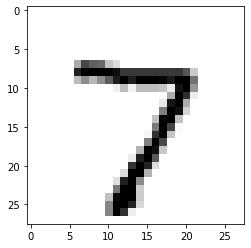

In [104]:
# Check if the record has been classified correctly
import matplotlib.pyplot as plt
X_test_vis = X_test[0].reshape(28, 28)
print(X_test_vis.shape)
plt.imshow(X_test_vis, cmap = plt.cm.binary)

In [105]:
# Add more layers
model  = keras.Sequential() 

#model.add(layers.Flatten(input_shape=(28, 28)))

model.add(layers.Dense(512, activation= "relu", input_shape=(784,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation= "softmax"))

In [106]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [107]:
batch_size = 128
epochs = 15

#crossentropy
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 7s 15ms/step - loss: 0.2926 - accuracy: 0.9119 - val_loss: 0.1009 - val_accuracy: 0.9705
Epoch 2/15
422/422 [==============================] - 6s 15ms/step - loss: 0.1180 - accuracy: 0.9637 - val_loss: 0.0808 - val_accuracy: 0.9763
Epoch 3/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0844 - accuracy: 0.9740 - val_loss: 0.0768 - val_accuracy: 0.9782
Epoch 4/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0656 - accuracy: 0.9793 - val_loss: 0.0778 - val_accuracy: 0.9765
Epoch 5/15
422/422 [==============================] - 6s 15ms/step - loss: 0.0516 - accuracy: 0.9841 - val_loss: 0.0741 - val_accuracy: 0.9792
Epoch 6/15
422/422 [==============================] - 8s 18ms/step - loss: 0.0445 - accuracy: 0.9856 - val_loss: 0.0633 - val_accuracy: 0.9825
Epoch 7/15
422/422 [==============================] - 6s 14ms/step - loss: 0.0373 - accuracy: 0.9874 - val_loss: 0.0731 - val_accuracy: 0.9810

In [109]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.07468417286872864
Test accuracy: 0.9843999743461609


In [ ]:
# Check history
history.history

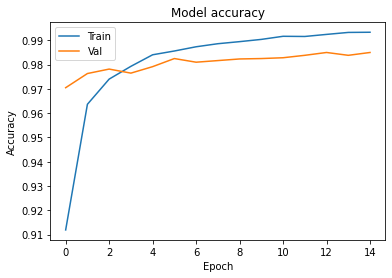

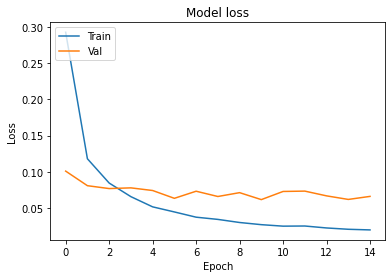

In [112]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()